### **Uber Data Analysis**

#### **Import Libraries**

In [73]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
import warnings
warnings.filterwarnings('ignore')

#### **Import Raw Data**

In [ ]:
df = pd.read_csv("C:/Users/Apurba Mandal/Documents/Portfolio/Uber/UberDataset_use.csv")
df.head()

In [8]:
df.shape

(1155, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   START_DATE_TIME  1155 non-null   object 
 1   END_DATE_TIME    1155 non-null   object 
 2   CATEGORY         1155 non-null   object 
 3   START            1155 non-null   object 
 4   STOP             1155 non-null   object 
 5   MILES            1155 non-null   float64
 6   PURPOSE          653 non-null    object 
 7   START_DATE       1155 non-null   object 
 8   START_TIME       1155 non-null   object 
 9   END_DATE         1155 non-null   object 
 10  END_TIME         1155 non-null   object 
 11  DURATION         1155 non-null   object 
 12  Column1          1155 non-null   object 
 13  Month            1155 non-null   object 
 14  Day              1155 non-null   object 
dtypes: float64(1), object(14)
memory usage: 135.5+ KB


#### **Data Cleaning**

In [79]:
df['PURPOSE'].fillna("NA", inplace=True)

In [11]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [93]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_TIME']).hour

In [94]:
df['Hours'] = pd.cut(x=df['time'], ##changing into categories of day and night
                              bins = [0,10,15,19,24],
                              labels = ['05:00-12:00','12:00-18:00','18:00-21:00','21:00-05:00'])

In [78]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = df[col].unique().size
unique_values

{'START_DATE_TIME': 1154,
 'END_DATE_TIME': 1154,
 'CATEGORY': 2,
 'START': 175,
 'STOP': 186,
 'PURPOSE': 11,
 'START_DATE': 293,
 'START_TIME': 689,
 'END_DATE': 294,
 'END_TIME': 681,
 'DURATION': 99,
 'Column1': 4,
 'Day': 7}

#### **KPIs Requirement**

In [24]:
Total_Distance_Covered = df['MILES'].sum()
print(f"Total Distance Covered (M): {Total_Distance_Covered}")

Total Distance Covered (M): 12194.8


In [29]:
Avg_Distance_Covered = df['MILES'].mean()
print(f"Avg Distance Covered (M): {Avg_Distance_Covered:.2f}")

Avg Distance Covered (M): 10.57


In [30]:
df['DURATION'] = pd.to_timedelta(df['DURATION'])
Avg_Time_of_Trip = df['DURATION'].mean()
print(f"Avg Time of Trip: {Avg_Time_of_Trip}")

Avg Time of Trip: 0 days 00:23:14.506065857


In [35]:
No_of_Trip = df['MILES'].count()
print(f"No of Trip: {No_of_Trip}")

No of Trip: 1154


#### **Category Distribution**

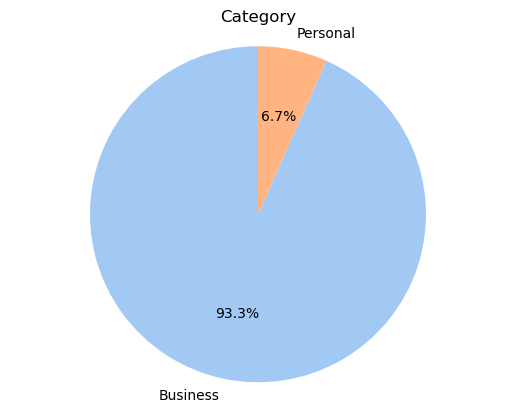

In [49]:
category_count = df['CATEGORY'].value_counts()
plt.pie(category_count,labels = category_count.index,
        colors=sns.color_palette('pastel'),
        autopct = '%1.1f%%',
        startangle = 90)
plt.title('Category')
plt.axis('equal')
plt.show()

In [38]:
category_distribution = df['CATEGORY'].value_counts()
category_distribution 

CATEGORY
Business    1077
Personal      77
Name: count, dtype: int64

#### **Daily Trip**

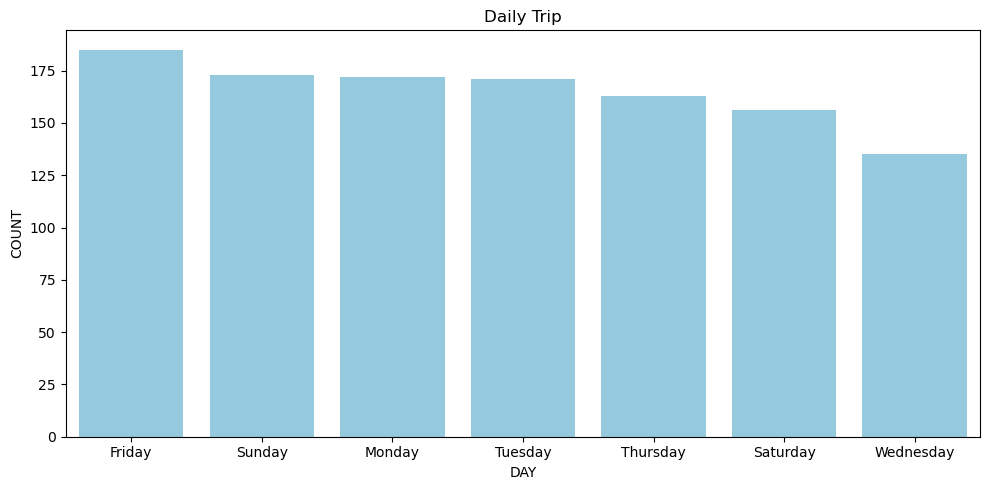

In [96]:
Day_label = df['Day'].value_counts()
plt.figure (figsize = (10,5))
sns.barplot (x=Day_label.index,y=Day_label,color='skyblue');
plt.xlabel('DAY')
plt.ylabel('COUNT')
plt.title ('Daily Trip')
plt.tight_layout()
plt.show()

#### **Monthly Trip**

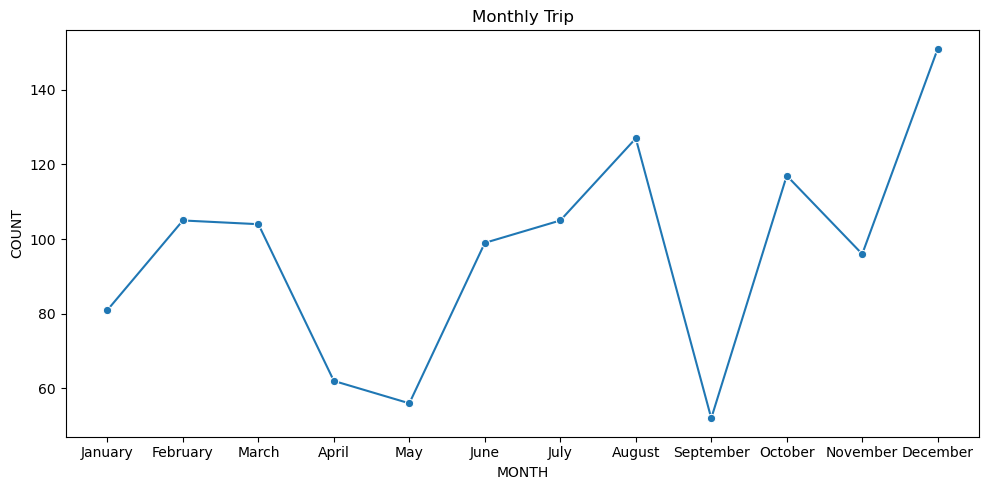

In [76]:
Month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=Month_order, ordered=True)
Month_label = df['Month'].value_counts().reindex(Month_order)
plt.figure (figsize = (10,5))
sns.lineplot (x=Month_label.index,y=Month_label,marker='o');
plt.xlabel('MONTH')
plt.ylabel('COUNT')
plt.title ('Monthly Trip')
plt.tight_layout()
plt.show()

#### **Dispute in Trip Purpose**

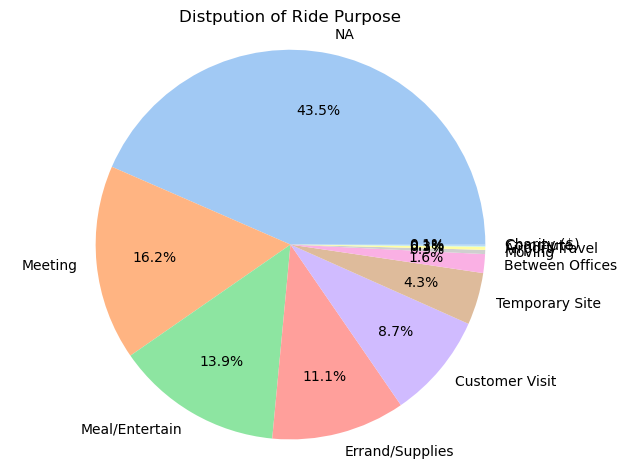

In [85]:
purpose_count = df['PURPOSE'].value_counts()
plt.pie(purpose_count,labels = purpose_count.index,
        colors=sns.color_palette('pastel'),
        autopct = '%1.1f%%',
        labeldistance=1.1,   # Push labels outward
        pctdistance=0.7)     # Position of % value
plt.title('Distpution of Ride Purpose')
plt.axis('equal')
plt.tight_layout()
plt.show()

#### **Peak Trip Hours**

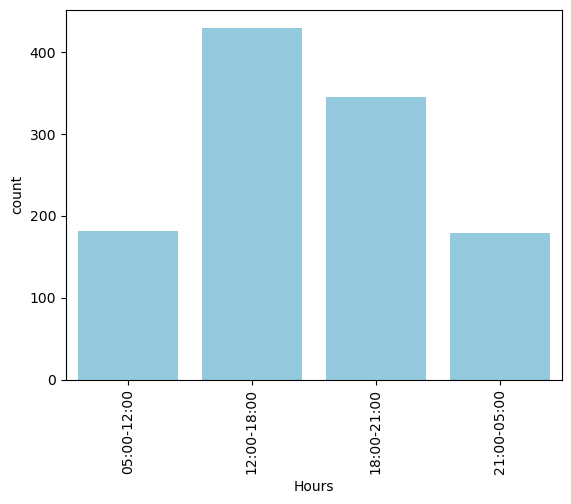

In [97]:
sns.countplot(x = 'Hours', data = df,color='skyblue')
plt.xticks(rotation=90)
plt.show()

#### **Top Staring Locations**

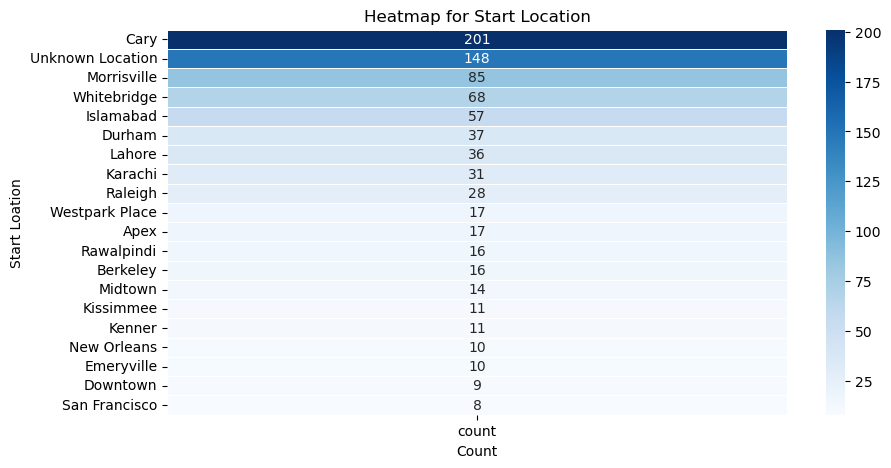

In [86]:
plt.figure(figsize=(10,5))
start_count = df['START'].value_counts().head(20)
sns.heatmap(start_count.to_frame(),annot = True, cmap="Blues",linewidth=0.5,fmt='d')
plt.title("Heatmap for Start Location")
plt.xlabel("Count")
plt.ylabel("Start Loation")
plt.show()

#### **Top Stoping Locations**

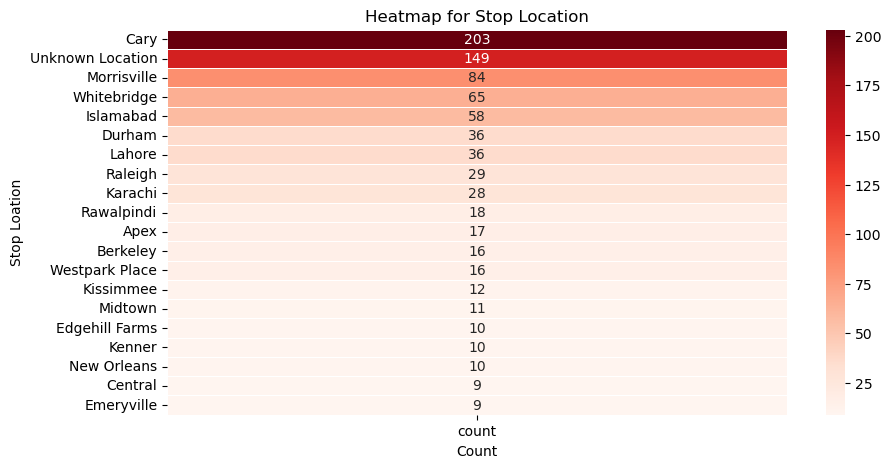

In [88]:
plt.figure(figsize=(10,5))
stop_count = df['STOP'].value_counts().head(20)
sns.heatmap(stop_count.to_frame(),annot = True, cmap="Reds",linewidth=0.5,fmt='d')
plt.title("Heatmap for Stop Location")
plt.xlabel("Count")
plt.ylabel("Stop Loation")
plt.show()